<a href="https://colab.research.google.com/github/iampatgrady/Colaboratory-Analytics-Demos/blob/master/Causal_Impact_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Causal Impact Analysis

In [1]:
!pip install causal-impact

In [0]:
import numpy as np
import pandas as pd
from causal_impact.causal_impact import CausalImpact

In [0]:
from google.colab import auth
auth.authenticate_user()

In [0]:
#@title Set default project
project_id = "YOUR-PROJECT-HERE" #@param {type:"string"}
from google.cloud.bigquery import magics
magics.context.project = project_id

In [0]:
%%bigquery source
SELECT 
  SUM(totals.pageviews) AS x1, -- you can add many control series
   -- we'll be faking the y in this example, normally add target here
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_2017*`                  
GROUP BY date
Order by date

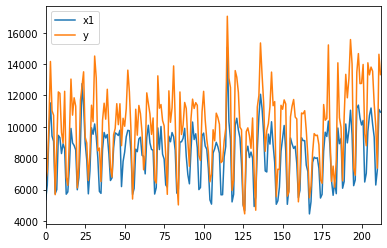

In [39]:
data = source.copy()
data['y'] = 1.2 * data['x1'] + np.random.normal(size=len(data))*1e3   # fake your y
data.loc[183:,'y'] += np.abs(np.random.normal(size=len(data)-183)*1e3)# fake post intervention
_ = data.plot()

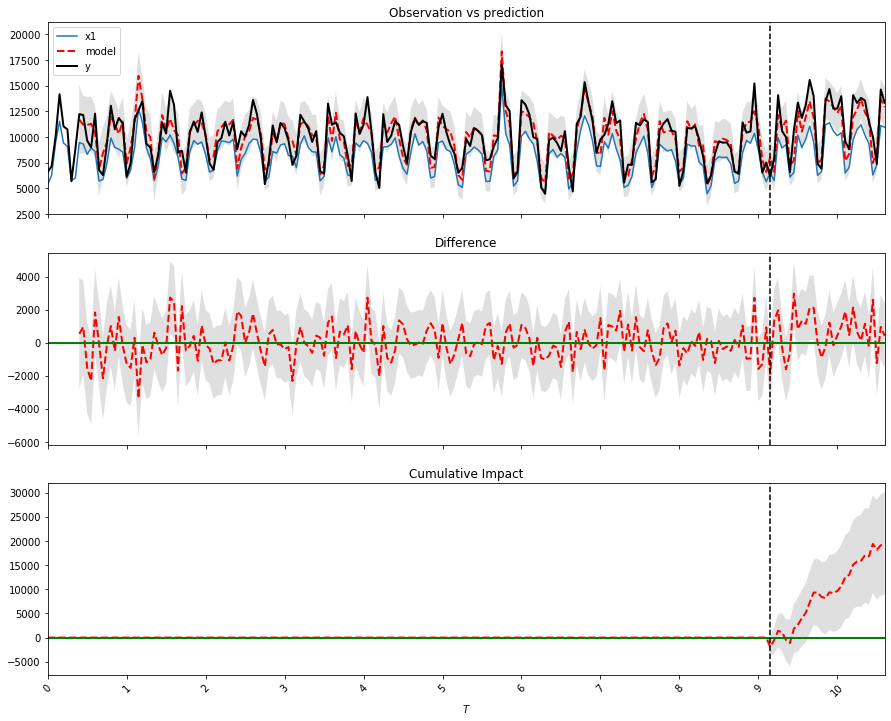

In [40]:
ci = CausalImpact(data[['y','x1']],  183 , n_seasons=7)
ci.run(max_iter=1000)
ci.plot()